### Solving the Newsvendor problem via Two Stage Problems

### First Stage Problem
$$
\begin{array}{rl}
\min_x & cx - \mathbb{E}[R(x, D)] \\
\text{s.t} & x\geq0\\
\end{array}
$$

### Second Stage Problem
$$
\begin{array}{rrl}
R(x,d) = &\max_{y,z} & py + rz\\
& \text{s.t} & y\leq d\\
 && y+z\leq x\\
 && y,z\geq 0
\end{array}
$$

### Second Stage Problem
$$
\begin{array}{rrrl}
Q(x,d)=&-R(x,d) = &\min_{y,z} & -py - rz\\
&& \text{s.t} & y\leq d\\
 &&& y+z\leq x\\
 &&& y,z\geq 0
\end{array}
$$

### First Stage Problem
$$
\begin{array}{rl}
\min_x & cx +\mathbb{E}[Q(x, D)]\\
\text{s.t} & x\geq0\\
\end{array}
$$

In [1]:
import numpy as np
import pandas as pd
import gurobipy as gp
import matplotlib.pyplot as plt

/var/folders/wl/8s06c36n7dbf3wr2b0q2n4kh0000gn/T/ipykernel_14461/1867644048.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
c= 10
p=15
r= 2

In [3]:
## coding the determinic equivalent problem
tab = pd.read_excel('data/lognormal_sample.xlsx')
def QQ(xx,i):
    
    x = xx[0]
    
    model = gp.Model()
    model.setParam('LogToConsole', 0)
    t = model.addVar(lb=-10000, name='t')
    y = model.addVar( lb=0, name='y')# second stage variable -- wait and see variable
    z = model.addVar(lb=0, name='z')# second stage variable -- wait and see variable
    
    model.addConstr( y <= tab.loc[i, 'Sample'])
    con = model.addConstr( y + z +t<= x)
    obj =-p*y - r*z + 1000*t*t
    model.setObjective(obj, sense=gp.GRB.MINIMIZE)
    model.optimize()
    return obj.getValue(), np.array([con.PI])

In [4]:
QQ([5],10)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-11


(-75.05624997787677, array([-15.00000001]))

In [5]:
def fg(xx):
  
    #print(xx)
    info = [QQ(xx, i) for i in tab.index]
    vv ,ss = zip(*info)
    val = c*xx[0] + sum(vv)/len(tab.index)
    sub = c+sum(ss)/len(tab.index)
    return val, sub

In [6]:
fg([5])

(-24.782421202831017, array([-4.80500007]))

In [7]:
x = np.linspace(0,60,100)
y = [fg([xx])[0] for xx in x]

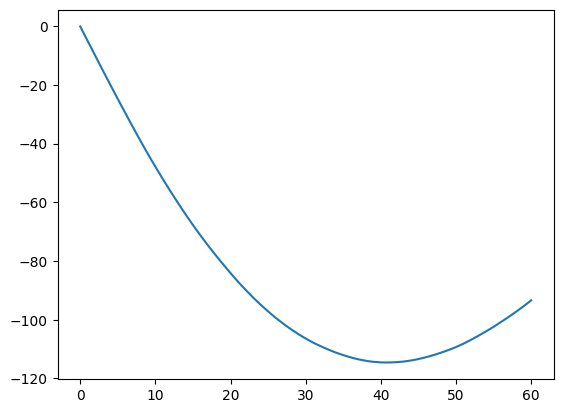

In [8]:
plt.plot(x,y)

In [9]:
import pynso.proxBundle as pb
import pynso.cuttingPlane as cp

In [10]:
result = cp.minimize(np.array([10]), fg=fg,lb=0, maxIter=50, globalLog='g.log',xLog='x.log')

Freeing default Gurobi environment
No models currently loaded
None
disposing


In [11]:
result

fval = -114.60689188572474
nIter = 11
status = 0
time = 2.5133330821990967
optimalityMeasure = 7.922013949723805e-06

In [12]:
result.x

array([40.99412491])

In [22]:
x = np.linspace(0,60,100)
y = [fg([xx])[1] for xx in x]

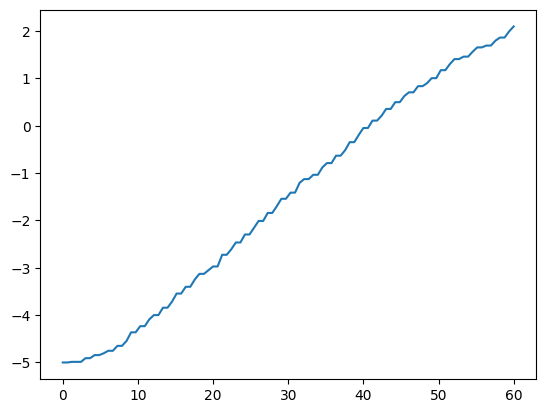

In [15]:
plt.plot(x,y)